In [189]:
import numpy as np

In [2]:
import time

In [4]:
import matplotlib.pyplot as plt

In [191]:
# Define parameter values
A=0.5
alpha=0.3
beta=0.5

In [192]:
n_k=1001

In [193]:
delta_values=[0.1,1]

In [194]:
#Define our tolerance
toler = 1e-5

In [195]:
# Define the utility function
def u(c):
    return np.log(c)

In [196]:
#Create initial guess for the value function
v_init=np.zeros(shape=(n_k,1))

In [197]:
max_iter=10000

In [198]:
policy=np.zeros(shape=(n_k,1))

In [199]:
v1=np.zeros(shape=(n_k,1))

In [200]:
v=np.zeros(shape=(n_k,1))

In [201]:
def Tv(v, k, d):
    start_time = time.time()
    iter = 0 #Start with iteration 0
    error = toler+1 #We need to set an initial error
    while (toler<error) and (iter<max_iter): #While these two conditions are true, do this.
        distance=np.zeros(shape=(n_k,1)) #We will use this vector to store the distance between the given value function and the new.
        for i in range(len(k)):#That is, for each element of the capital grid, perform the following:
            vmax = -np.inf #We need to set an initial value for vmax. As soon as we do something, this will update
            for j in range(len(k)): #Fixing an element in the grid, calculate consumption and the value of selecting each feasible capital stock tomorrow
                c = A * k[i] ** alpha + (1-d) * k[i] - k[j] #Consumption
                if c>=0: #remember that c must be nonnegative
                    v_temp = u(c)+beta*v[j] #calculate the value using the consumption from above, and the current element j of the value function, which represents the value of having that capital stock tomorrow.
                    if v_temp>vmax: #if the choice j' is better than j, then
                        vmax=v_temp #set j' as the new best choice
                        policy_i=k[j] #and set that choice j' as the policy for element i of the capital stock
                v1[i]=vmax #Now, once we have found vmax for a given i, set element i of the new value function to be that value
                policy[i]=policy_i #Find the new policy function by setting element i to be the best choice j'
                distance[i]=np.abs(vmax-v[i]) #new distance
        error=np.max(distance) #set new error
        v=np.copy(v1) #set v as the new calculation v1
        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") #print Iteration number and error size every 10 iterations
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") #if we don't converge, let me know
    end_time = time.time()  # Record end time
    execution_time = end_time - start_time #how long did it take?
    print(f"Execution time: {execution_time} seconds")
    return v, policy #give me the value fuction and the policy function


iterating for delta = 0.1:
Iteration 0, Max Error: 4.147088067604302
Iteration 10, Max Error: 0.0017950505689885432
Execution time: 116.66100120544434 seconds


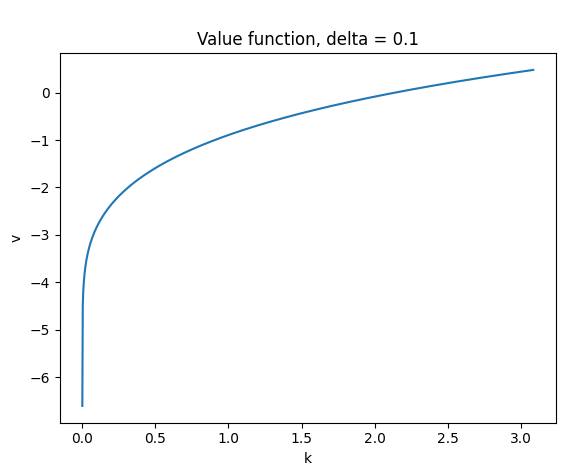

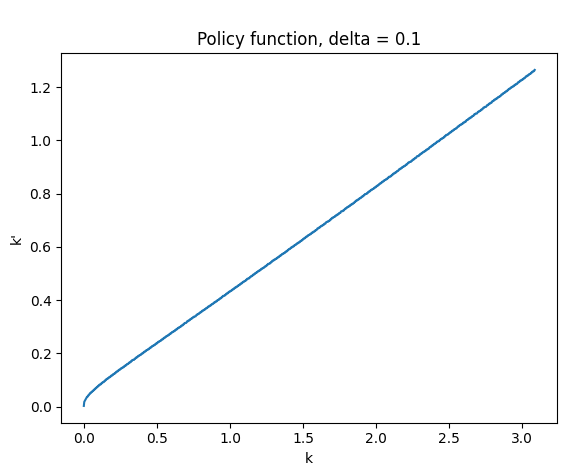


iterating for delta = 1:
Iteration 0, Max Error: 4.1476574756674145
Iteration 10, Max Error: 0.002081977051991757
Execution time: 106.42420268058777 seconds


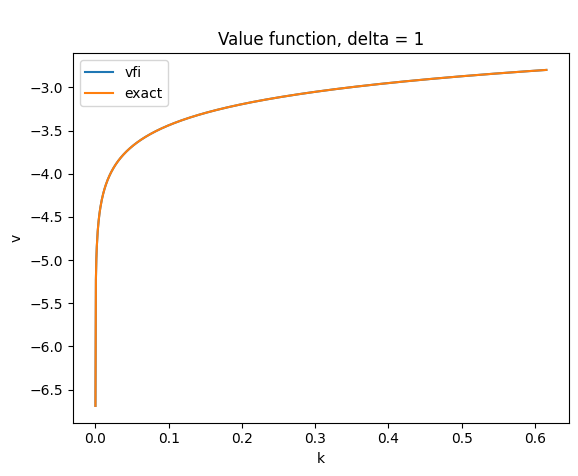

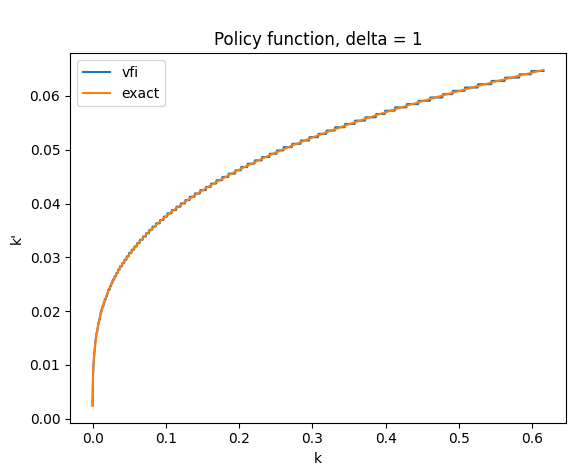

In [203]:
for delta in delta_values:
    if delta == 1:
        K_tilde = ( A / delta ) ** (1/1-alpha)
        K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
        + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
        a1 = alpha / (1 - alpha * beta)
        plt.plot(K_grid, final_v, label='vfi')
        plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.legend()
        plt.show()
        plt.plot(K_grid, final_policy, label='vfi')
        plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.legend()
        plt.show()
    else:
        K_tilde = ( A / delta ) ** (1/1-alpha)
        K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv(v_init, K_grid, delta)
        plt.plot(K_grid, final_v)
        plt.title(f"\nValue function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("v")
        plt.show()
        plt.plot(K_grid, final_policy)
        plt.title(f"\nPolicy function, delta = {delta}")
        plt.xlabel('k')
        plt.ylabel("k'")
        plt.show()



In [204]:
m_values=[5,10,25,100,500]

In [205]:
def Tv_howard(v, k, m, d):
    start_time = time.time()
    iter = 0 
    error = toler+1
    v1=np.zeros(shape=(n_k,1))
    v2=np.zeros(shape=(n_k,1))
    while (toler<error) and (iter<max_iter): 
        distance=np.zeros(shape=(n_k,1)) 
        policy_i=np.zeros(shape=(n_k,1))
        for i in range(len(k)):
            vmax = -np.inf 
            for j in range(len(k)):
                c = A * k[i] ** alpha + (1-delta) * k[i] - k[j] 
                if c>=0: 
                    v_temp = u(c)+beta*v[j] 
                    if v_temp>vmax: 
                        vmax=v_temp 
                        policy_i[i]=k[j] 
                v1[i]=vmax     
        v=np.copy(v1)
        for _ in range(m):
            for i in range(len(k)):
                c = A * k[i] ** alpha + (1-d) * k[i] - policy_i[i]
                for j in range(len(k)):
                    if k[j] == policy_i[i]:
                        idx = j
                v2[i]=u(c)+beta*v1[idx]
        v1=np.copy(v2)           
        for i in range(len(k)):
            distance[i]=np.abs(v1[i]-v[i]) 
        error=np.max(distance) 

        if iter % 10 == 0:
            print(f"Iteration {iter}, Max Error: {error}") 
        iter+=1
    if iter == max_iter:
        print("Failed to converge in max_iter iterations") 
    end_time = time.time()  
    execution_time = end_time - start_time 
    print(f"Execution time: {execution_time} seconds")
    return v, policy_i 

In [206]:
for m in m_values:
    print(f"\niterating for m = {m}:")
    for delta in delta_values:
        K_tilde = ( A / delta ) ** (1/1-alpha)
        K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)


iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0735440338021514


KeyboardInterrupt: 


iterating for m = 5:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0735440338021514
Iteration 10, Max Error: 0.0008975252844942716
Execution time: 192.49678659439087 seconds


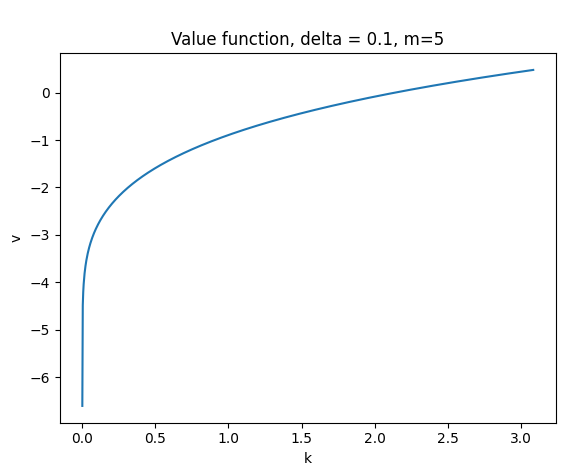

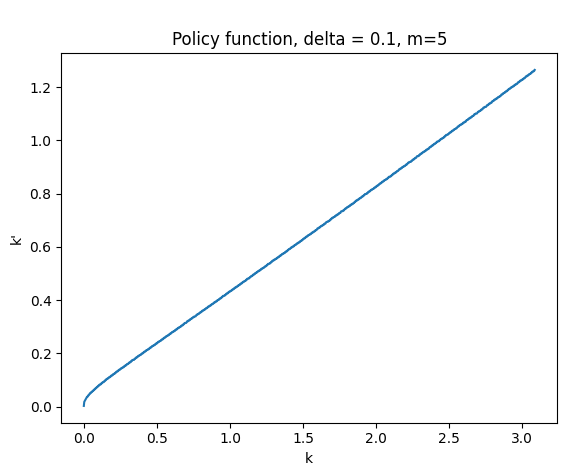


iterating for delta = 1:
Iteration 0, Max Error: 2.0738287378337077
Iteration 10, Max Error: 0.0010409885259958784
Execution time: 180.3455114364624 seconds


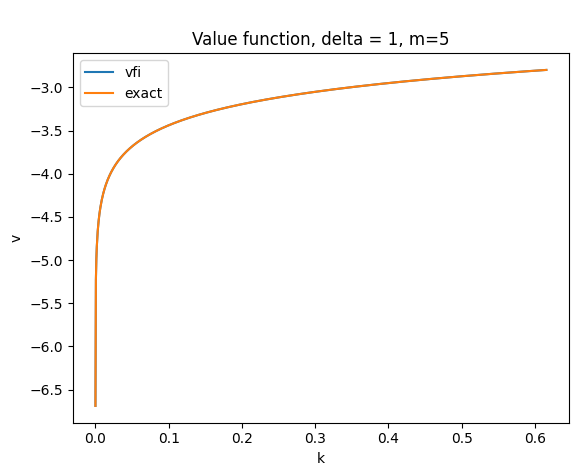

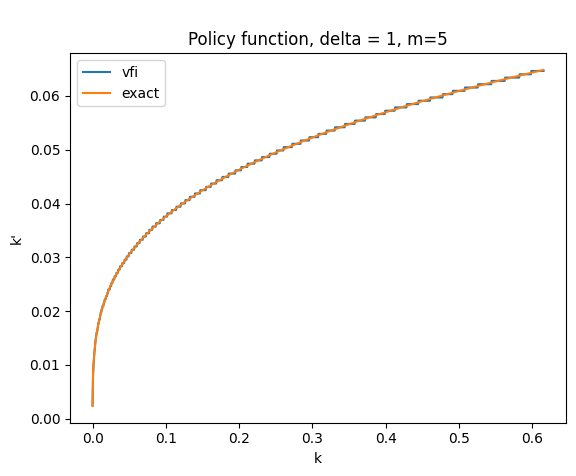


iterating for m = 10:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0735440338021514
Iteration 10, Max Error: 0.0008975252844942716
Execution time: 308.08369731903076 seconds


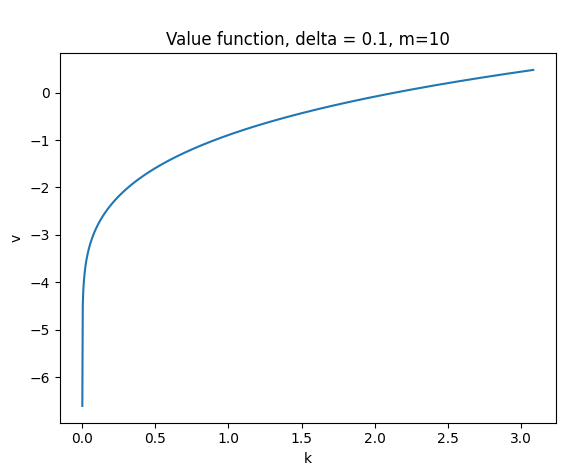

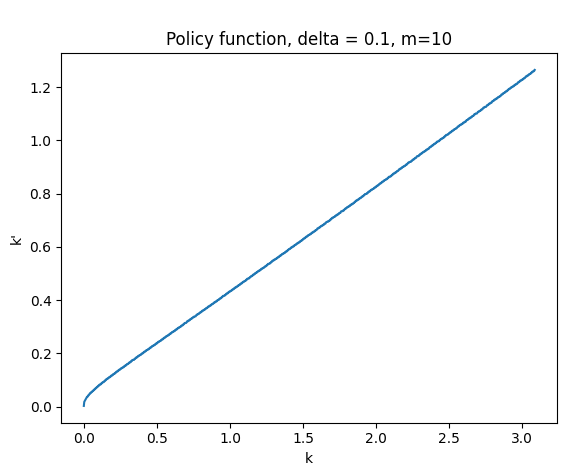


iterating for delta = 1:
Iteration 0, Max Error: 2.0738287378337077
Iteration 10, Max Error: 0.0010409885259958784
Execution time: 301.95629811286926 seconds


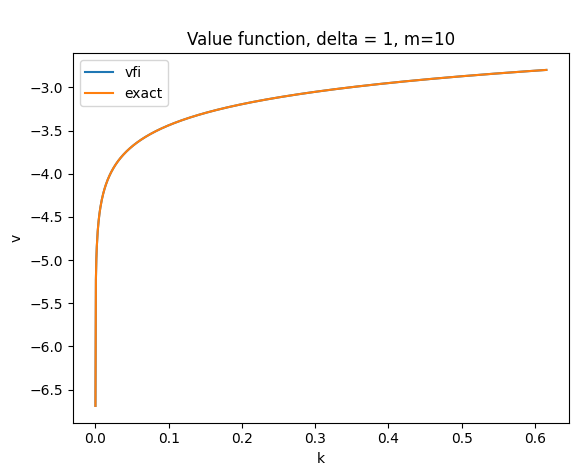

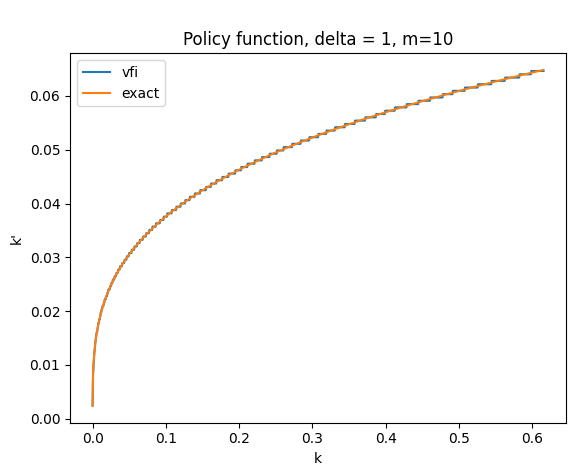


iterating for m = 25:

iterating for delta = 0.1:
Iteration 0, Max Error: 2.0735440338021514
Iteration 10, Max Error: 0.0008975252844942716


KeyboardInterrupt: 

In [207]:
for m in m_values:
    print(f"\niterating for m = {m}:")
    for delta in delta_values:
        #K_tilde = ( A / delta ) ** (1/1-alpha)
        #K_grid = np.linspace(1e-5 , K_tilde, n_k)
        print(f"\niterating for delta = {delta}:")
        #final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
        if delta == 1:
            K_tilde = ( A / delta ) ** (1/1-alpha)
            K_grid = np.linspace(1e-5 , K_tilde, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            a0 = (np.log(A) + (1 - alpha * beta) * np.log(1 - alpha * beta) \
            + alpha * beta * np.log(alpha * beta)) / ((1 - beta) * (1 - alpha * beta))
            a1 = alpha / (1 - alpha * beta)
            plt.plot(K_grid, final_v, label='vfi')
            plt.plot(K_grid, a0 + a1 * np.log(K_grid), label='exact')
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.legend()
            plt.show()
            plt.plot(K_grid, final_policy, label='vfi')
            plt.plot(K_grid, A * alpha * beta * K_grid ** alpha, label='exact')
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.legend()
            plt.show()
        else:
            K_tilde = ( A / delta ) ** (1/1-alpha)
            K_grid = np.linspace(1e-5 , K_tilde, n_k)
            final_v, final_policy = Tv_howard(v_init, K_grid, m, delta)
            plt.plot(K_grid, final_v)
            plt.title(f"\nValue function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("v")
            plt.show()
            plt.plot(K_grid, final_policy)
            plt.title(f"\nPolicy function, delta = {delta}, m={m}")
            plt.xlabel('k')
            plt.ylabel("k'")
            plt.show()